# **E-Commerce Product Delivery Prediction**

## **Introduction**

### **Objectives**

The aim of this project to predict whether the product from an e-commerce company will reach on time or not. This project also analyzes various factors that affect the delivery of the product as well as studies the customer behavior. An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

### **Dataset**

The dataset contains 10.999 observations of 12 variables and was received from [Kaggle](https://www.kaggle.com/datasets/prachi13/customer-analytics) The data contains the following information:

| Column           | Description                                                                                   |
|---------------------|-----------------------------------------------------------------------------------------------|
| ID                  | ID Number of Customers                                                                        |
| Warehouse_block     | The Company have big Warehouse which is divided into block such as A,B,C,D,E                 |
| Mode_of_Shipment   | The Company Ships the products in multiple way such as Ship, Flight and Road                  |
| Customer_care_calls | The number of calls made from enquiry for enquiry of the shipment                             |
| Customer_rating     | The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)  |
| Cost_of_the_Product| Cost of the Product in US Dollars                                                             |
| Prior_purchases     | The Number of Prior Purchase                                                                  |
| Product_importance  | The company has categorized the product in the various parameter such as low, medium, high   |
| Gender              | Male and Female                                                                               |
| Discount_offered    | Discount offered on that specific product                                                     |
| Weight_in_gms       | It is the weight in grams                                                                     |
| Reached.on.Time_Y.N | It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time |


## **Gathering and Cleansing**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [17]:
df = pd.read_csv("../data/train.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [18]:
print("First rows:")
display(df.head(5))


First rows:


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [19]:
# Number of rows before removing duplicates
before_rm = len(df)

# Removing duplicates across all rows
df.drop_duplicates(inplace=True)

# Number of rows after removing duplicates
after_rm = len(df)

# Number of duplicates removed
removed_duplicates = before_rm - after_rm

print("Number of removed duplicates:", removed_duplicates)

Number of removed duplicates: 0


In [20]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [21]:
print("Descriptive Statistics:")
display(df.describe())

Descriptive Statistics:


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [22]:
# Assuming the DataFrame 'df' is already loaded and ready for inspection
# Define a list of columns to display unique values for
columns_to_inspect = [
    'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Reached.on.Time_Y.N', 
]

# Loop through the columns to iterate and display unique values for each column
for column in columns_to_inspect:
    # Check if the column exists in the DataFrame, as exact column names might vary
    if column in df.columns:
        # Print unique values found in the column
        print(f"Unique values in '{column}': {df[column].unique()}")
    else:
        # Notify if the column does not exist in the DataFrame
        print(f"Column '{column}' does not exist in the DataFrame.")


Unique values in 'Customer_care_calls': [4 2 3 5 6 7]
Unique values in 'Customer_rating': [2 5 3 1 4]
Unique values in 'Prior_purchases': [ 3  2  4  6  5  7 10  8]
Unique values in 'Reached.on.Time_Y.N': [1 0]


In [23]:
# Replace values in target column
df["Reached.on.Time_Y.N"] = df["Reached.on.Time_Y.N"].replace({1: 'Not on time', 0: 'On time'}).astype("category")

# Renaming the column 'Reached.on.Time_Y.N' to 'target'
df.rename(columns={'Reached.on.Time_Y.N': 'target'}, inplace=True)

# Removing the 'ID' column
df.drop(columns=['ID'], inplace=True, errors='ignore')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Warehouse_block      10999 non-null  object  
 1   Mode_of_Shipment     10999 non-null  object  
 2   Customer_care_calls  10999 non-null  int64   
 3   Customer_rating      10999 non-null  int64   
 4   Cost_of_the_Product  10999 non-null  int64   
 5   Prior_purchases      10999 non-null  int64   
 6   Product_importance   10999 non-null  object  
 7   Gender               10999 non-null  object  
 8   Discount_offered     10999 non-null  int64   
 9   Weight_in_gms        10999 non-null  int64   
 10  target               10999 non-null  category
dtypes: category(1), int64(6), object(4)
memory usage: 956.1+ KB


## **Data Exploration**

### **Gender**

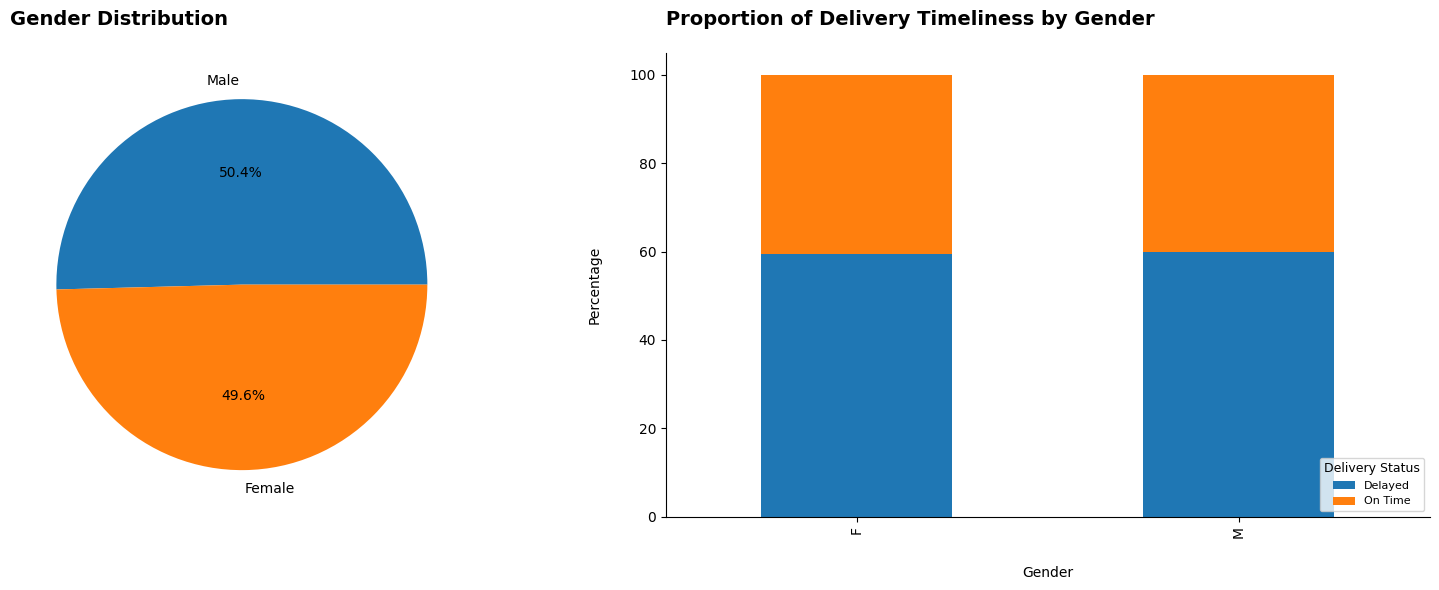

In [54]:
# Prepare figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Pie-Chart for 'Gender' on the left side
df['Gender'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%', labels=['Male', 'Female'])
axes[0].set_ylabel('')
axes[0].set_title('Gender Distribution', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Create a crosstab between 'Gender' and 'target' for the Crosstab Plot
crosstab = pd.crosstab(index=df['Gender'], columns=df['target'], normalize='index') * 100

# Draw the stacked bar plot horizontally on the right side
crosstab.plot(kind='bar', stacked=True, ax=axes[1])

# Set labels and title
axes[1].set_title('Proportion of Delivery Timeliness by Gender', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[1].set_ylabel("Percentage", fontsize=10, labelpad=20)
axes[1].set_xlabel('Gender', fontsize=10, labelpad=20)

# Hide top and right spines
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Customize the legend: make it smaller and place it at the lower right corner
axes[1].legend(title='Delivery Status', labels=['Delayed', 'On Time'], fontsize=8, title_fontsize=9, loc='lower right', bbox_to_anchor=(1, 0))

plt.tight_layout()
plt.show()


### **Logistics**
#### **Mode of Shipment**

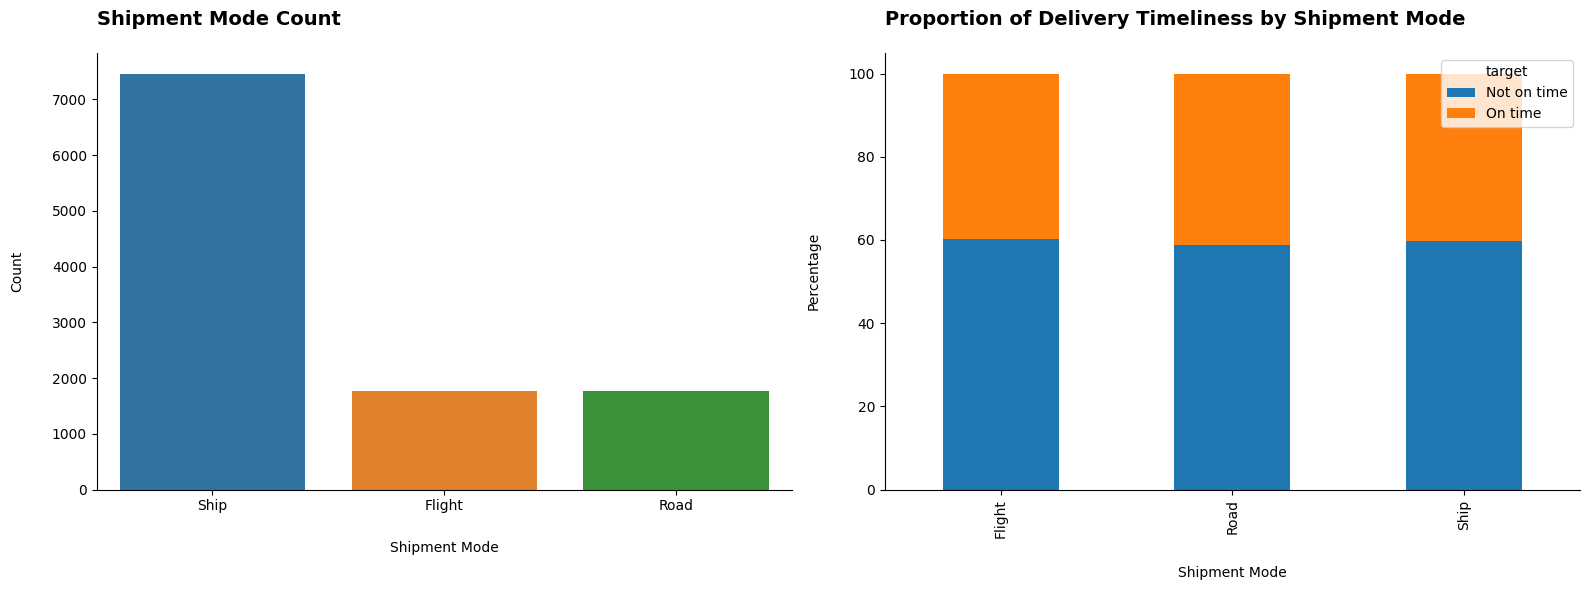

In [74]:
# Sort the data by the count of each category in 'Mode_of_Shipment'
sorted_shipment_modes = df['Mode_of_Shipment'].value_counts().index

# Prepare figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot countplot for 'Mode_of_Shipment' on the left side
sns.countplot(data=df, x='Mode_of_Shipment', order=sorted_shipment_modes, ax=axes[0])
axes[0].set_title('Shipment Mode Count', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[0].set_ylabel("Count", fontsize=10, labelpad=20)
axes[0].set_xlabel('Shipment Mode', fontsize=10, labelpad=20)

# Hide top and right spines
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Create a crosstab between 'Mode_of_Shipment' and 'target' for the Crosstab Plot
crosstab = pd.crosstab(index=df['Mode_of_Shipment'], columns=df['target'], normalize='index') * 100

# Draw the stacked bar plot horizontally on the right side
crosstab.plot(kind='bar', stacked=True, ax=axes[1])

# Set labels and title
axes[1].set_title('Proportion of Delivery Timeliness by Shipment Mode', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[1].set_ylabel("Percentage", fontsize=10, labelpad=20)
axes[1].set_xlabel('Shipment Mode', fontsize=10, labelpad=20)

# Hide top and right spines
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Customize the legend: make it smaller and place it at the lower right corner
#axes[1].legend(title='Delivery Status', labels=['Delayed', 'On Time'], fontsize=8, title_fontsize=9, loc='lower right', bbox_to_anchor=(1, 0))

plt.tight_layout()
plt.show()


#### **Warehouse Block**

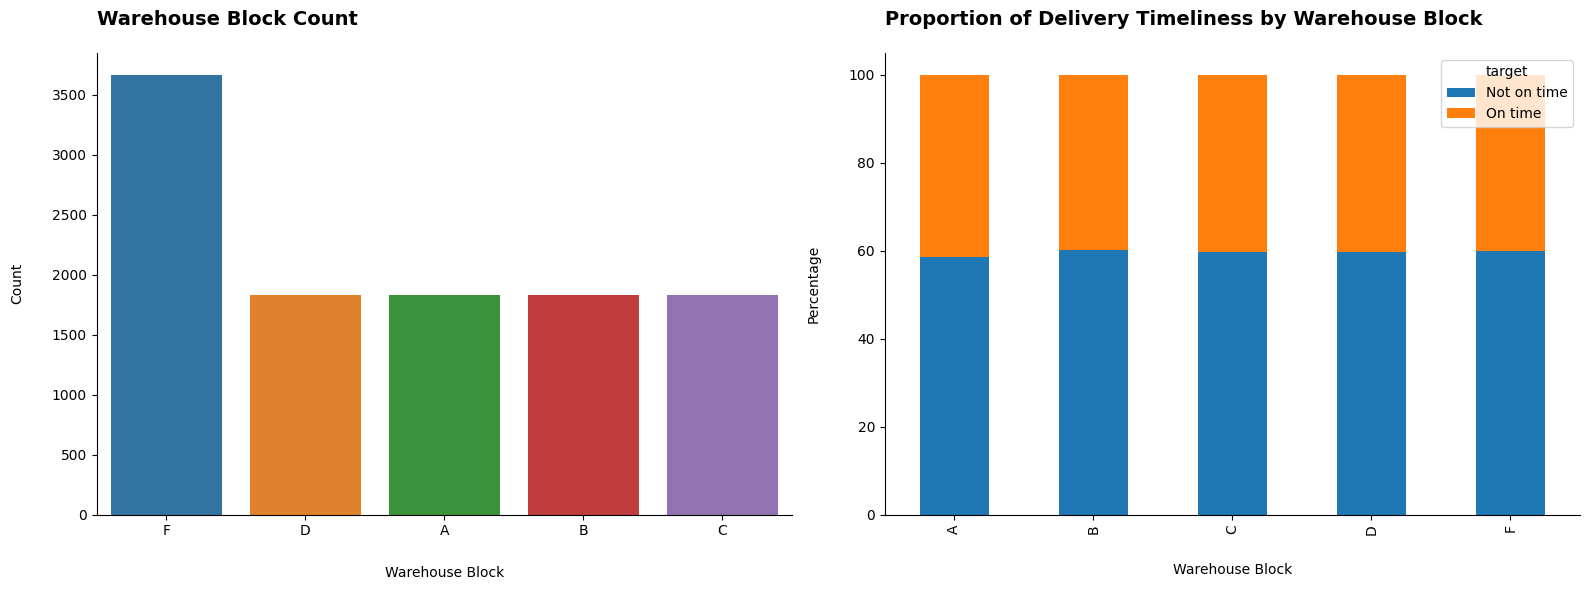

In [57]:
# Sort the data by the count of each category in 'Warehouse_block'
sorted_warehouse_blocks = df['Warehouse_block'].value_counts().index

# Prepare figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot countplot for 'Warehouse_block' on the left side
sns.countplot(data=df, x='Warehouse_block', order=sorted_warehouse_blocks, ax=axes[0])
axes[0].set_title('Warehouse Block Count', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[0].set_ylabel("Count", fontsize=10, labelpad=20)
axes[0].set_xlabel('Warehouse Block', fontsize=10, labelpad=20)

# Hide top and right spines
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Create a crosstab between 'Warehouse_block' and 'target' for the Crosstab Plot
crosstab = pd.crosstab(index=df['Warehouse_block'], columns=df['target'], normalize='index') * 100

# Draw the stacked bar plot horizontally on the right side
crosstab.plot(kind='bar', stacked=True, ax=axes[1])

# Set labels and title
axes[1].set_title('Proportion of Delivery Timeliness by Warehouse Block', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[1].set_ylabel("Percentage", fontsize=10, labelpad=20)
axes[1].set_xlabel('Warehouse Block', fontsize=10, labelpad=20)

# Hide top and right spines
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Customize the legend: make it smaller and place it at the lower right corner
#axes[1].legend(title='Delivery Status', labels=['Delayed', 'On Time'], fontsize=8, title_fontsize=9, loc='lower right', bbox_to_anchor=(1, 0))

plt.tight_layout()
plt.show()


#### **Punctuality of Delivery**

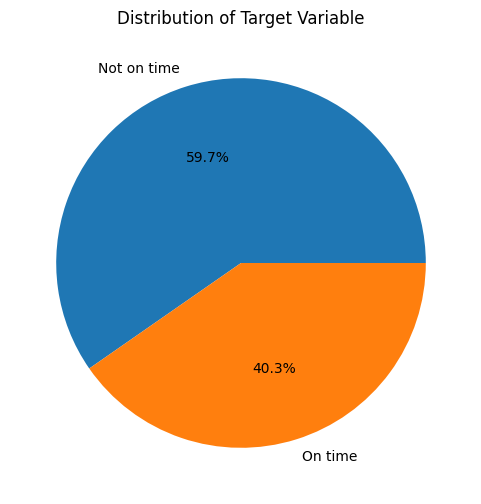

In [61]:
# Zähle die Anzahl der verschiedenen Kategorien in der 'target'-Spalte
target_counts = df['target'].value_counts()

# Erstelle ein Pie-Plot
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Target Variable')
plt.show()


### **Product Features**
#### **Product Importance**

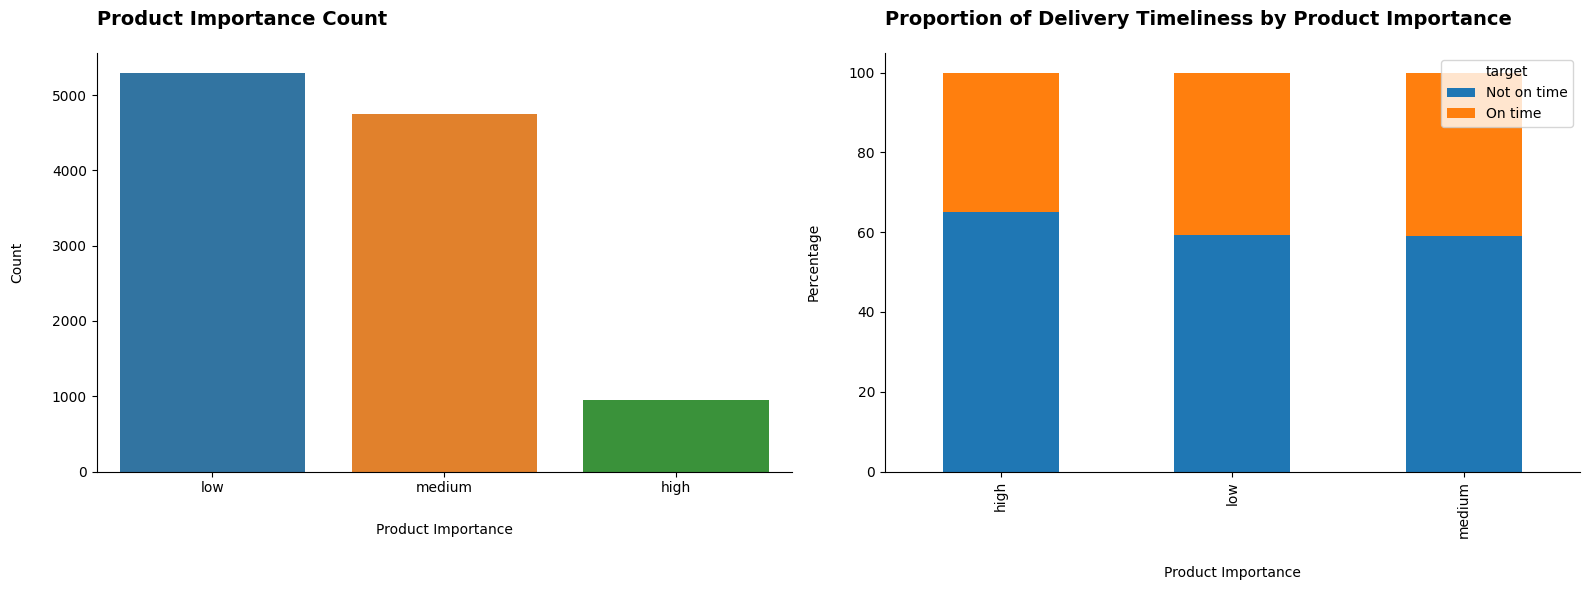

In [62]:
# Sort the data by the count of each category in 'Product_importance'
sorted_product_importance = df['Product_importance'].value_counts().index

# Prepare figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot countplot for 'Product_importance' on the left side
sns.countplot(data=df, x='Product_importance', order=sorted_product_importance, ax=axes[0])
axes[0].set_title('Product Importance Count', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[0].set_ylabel("Count", fontsize=10, labelpad=20)
axes[0].set_xlabel('Product Importance', fontsize=10, labelpad=20)

# Hide top and right spines
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Create a crosstab between 'Product_importance' and 'target' for the Crosstab Plot
crosstab = pd.crosstab(index=df['Product_importance'], columns=df['target'], normalize='index') * 100

# Draw the stacked bar plot horizontally on the right side
crosstab.plot(kind='bar', stacked=True, ax=axes[1])

# Set labels and title
axes[1].set_title('Proportion of Delivery Timeliness by Product Importance', fontsize=14, pad=20, loc="left", fontweight="bold")
axes[1].set_ylabel("Percentage", fontsize=10, labelpad=20)
axes[1].set_xlabel('Product Importance', fontsize=10, labelpad=20)

# Hide top and right spines
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Customize the legend: make it smaller and place it at the lower right corner
#axes[1].legend(title='Delivery Status', labels=['Delayed', 'On Time'], fontsize=8, title_fontsize=9, loc='lower right', bbox_to_anchor=(1, 0))

plt.tight_layout()
plt.show()


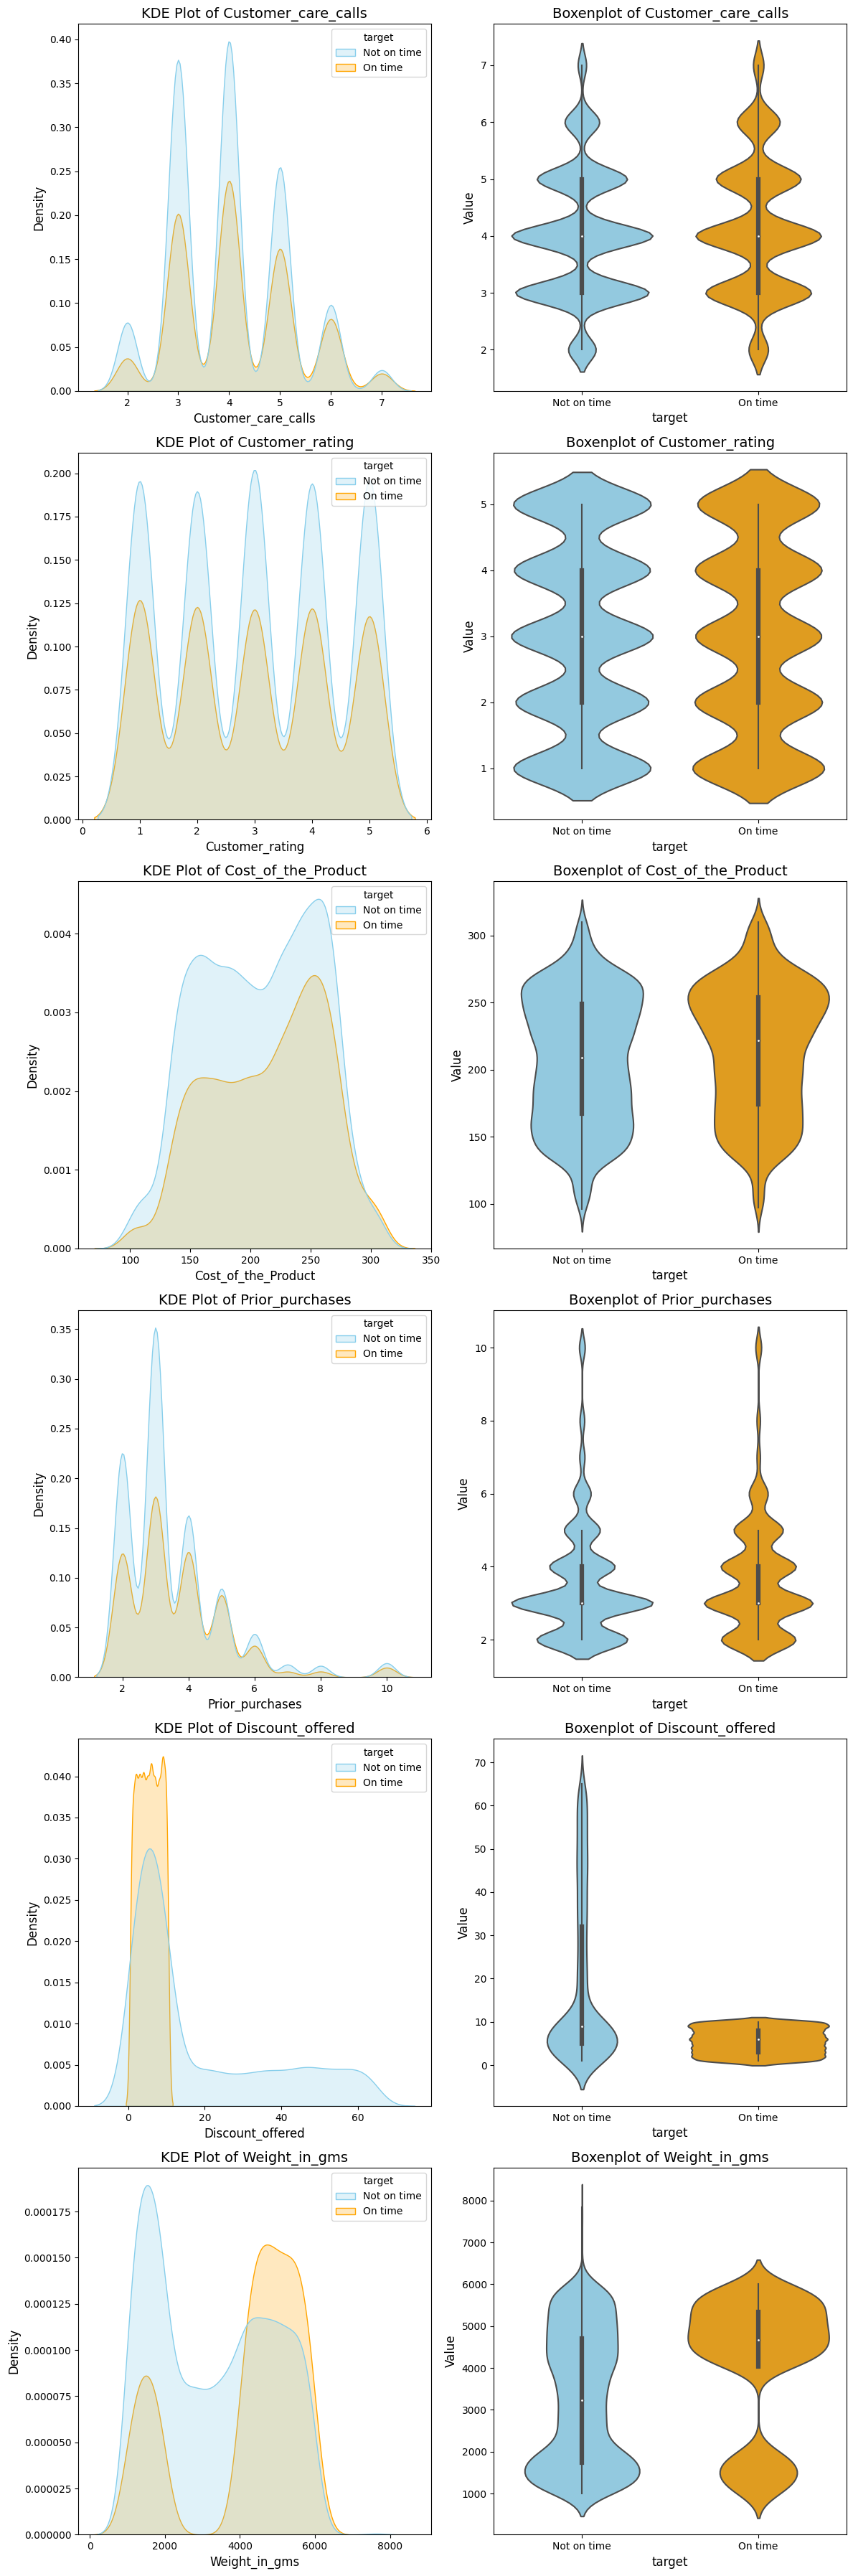

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Get numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Set up the figure and axes
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, len(numerical_columns) * 6))

# Loop through numerical columns and create plots
for i, column in enumerate(numerical_columns):
    # KDE Plot
    sns.kdeplot(data=df, x=column, hue='target', ax=axes[i][0], fill=True, palette=['skyblue', 'orange'])
    axes[i][0].set_title(f'KDE Plot of {column}', fontsize=14)
    axes[i][0].set_xlabel(column, fontsize=12)
    axes[i][0].set_ylabel('Density', fontsize=12)

    # Boxenplot
    sns.violinplot(data=df, x='target', y=column, ax=axes[i][1], palette=['skyblue', 'orange'])
    axes[i][1].set_title(f'Boxenplot of {column}', fontsize=14)
    axes[i][1].set_xlabel('target', fontsize=12)
    axes[i][1].set_ylabel('Value', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# Logistics
#Mode of shipment
#warehouse Block 

# customer
customer_care_calls
customer_rating
discount_offered
prior_purchases

#product
weight
#product importance
cost product



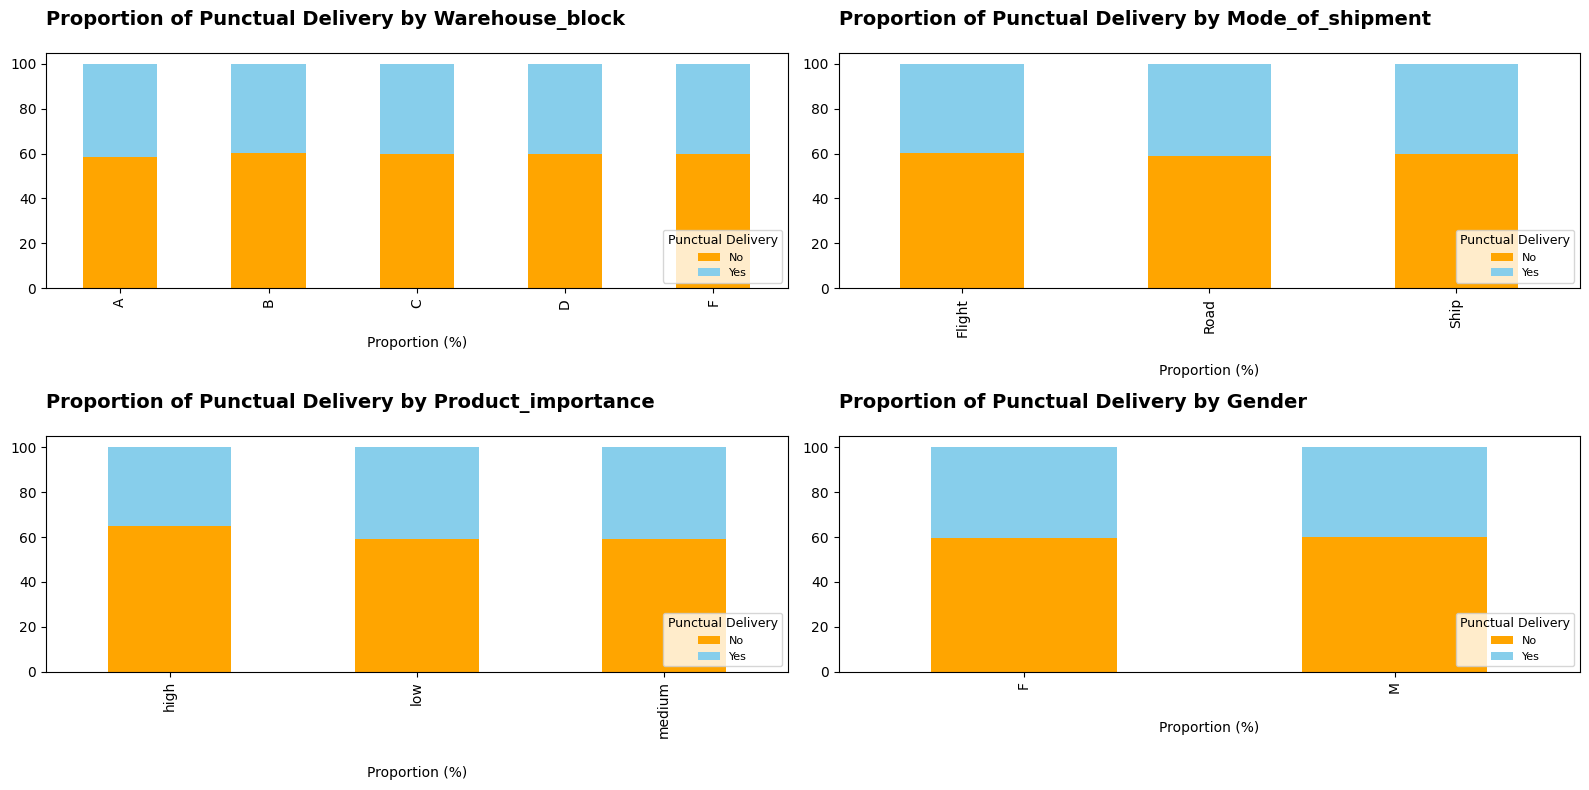

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: df ist dein DataFrame

# Liste aller kategorischen Spalten, für die du die Diagramme erstellen möchtest
categorical_columns = df.select_dtypes(include=['object']).columns

# Anzahl der Reihen bestimmen, abhängig von der Anzahl der kategorischen Spalten
rows = len(categorical_columns) // 2 + len(categorical_columns) % 2

# Figur und Achsen für Subplots vorbereiten
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 4))
axes = axes.flatten()  # Achsen in ein 1D-Array umwandeln für einfacheren Zugriff

for i, column in enumerate(categorical_columns):
    # Erstelle eine Kreuztabelle zwischen der kategorischen Spalte und der Zielvariablen
    crosstab = pd.crosstab(index=df[column], columns=df['target'], normalize='index') * 100
    
    # Zeichne das Balkendiagramm mit gestapelten Balken horizontal
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=['orange', 'skyblue'])
    
    # Beschriftungen und Titel festlegen und kleiner machen
    axes[i].set_title(f'Proportion of Punctual Delivery by {column.capitalize()}', fontsize=14, pad=20, loc="left", fontweight="bold")
    axes[i].set_ylabel("", fontsize=10, labelpad=20)
    axes[i].set_xlabel('Proportion (%)', fontsize=10, labelpad=20)
    
    # Anpassung der Legende: kleiner machen und unten rechts platzieren
    axes[i].legend(title='Punctual Delivery', labels=['No', 'Yes'], fontsize=8, title_fontsize=9, loc='lower right', bbox_to_anchor=(1, 0))

# Verstecke überschüssige Subplot-Achsen, falls die Anzahl der kategorischen Spalten ungerade ist
if len(categorical_columns) % 2 != 0:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


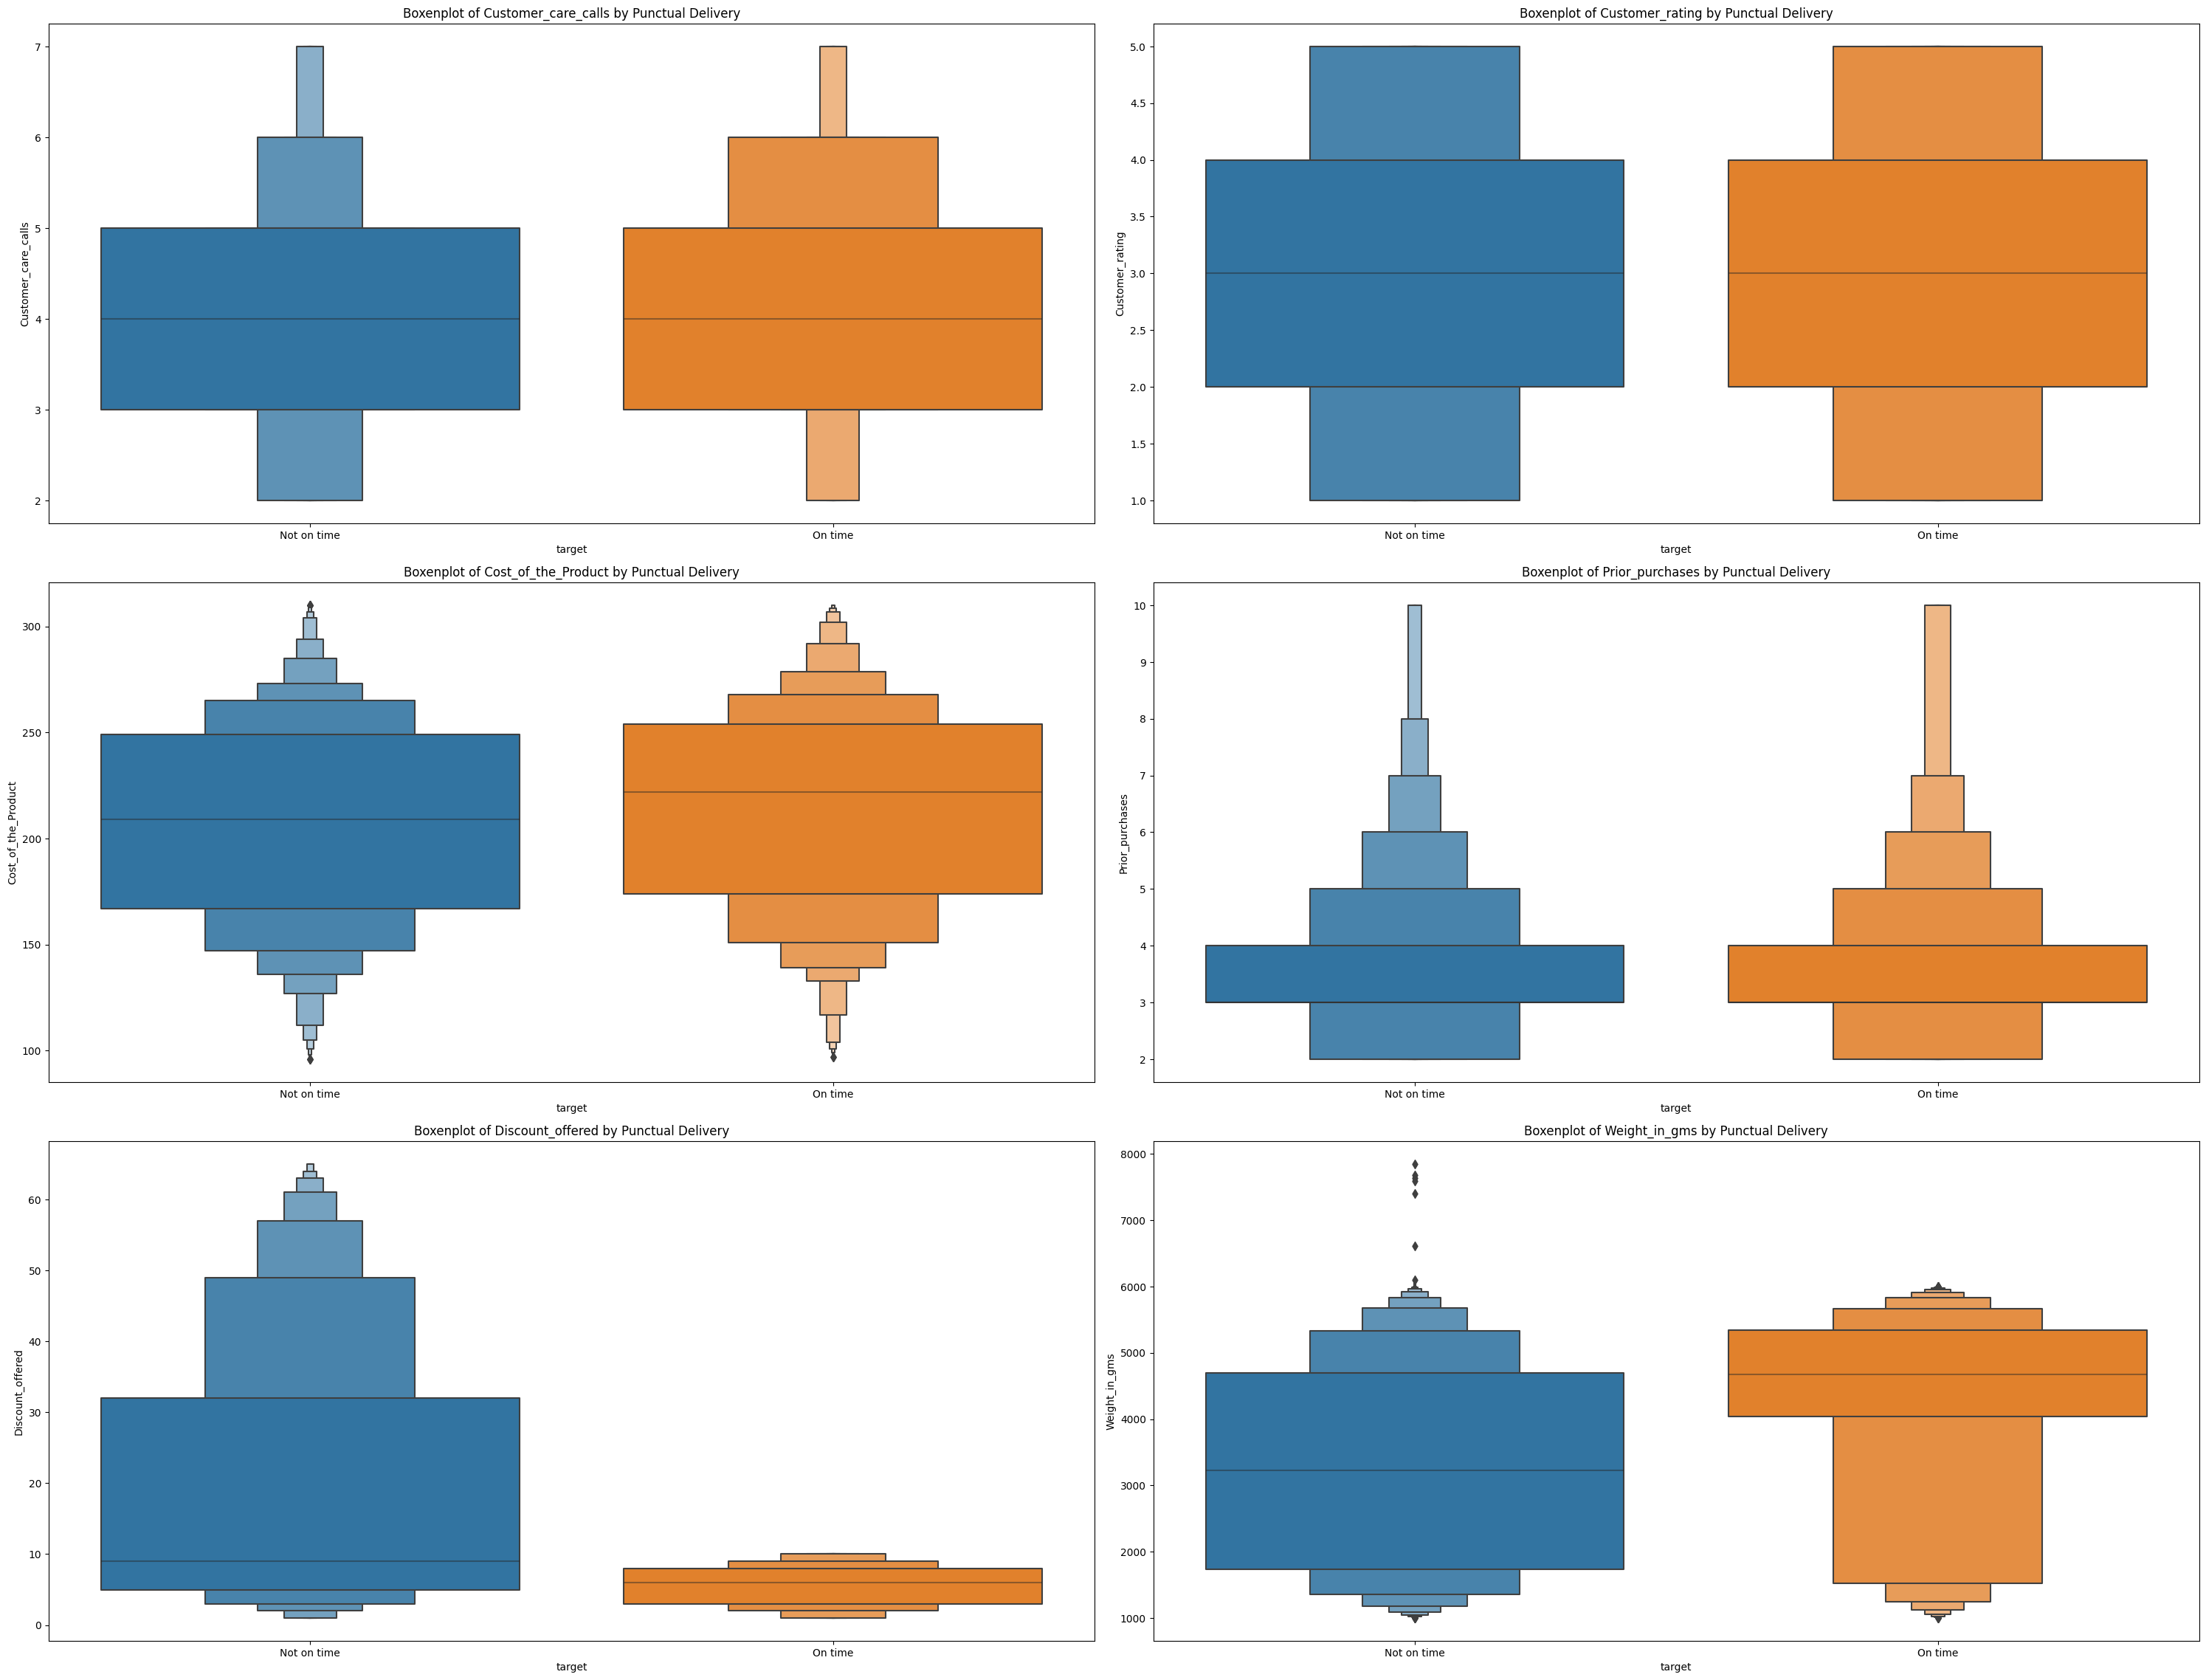

In [26]:
# Liste der numerischen Spalten
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_subplots_per_row = 2

# Erstelle Boxenplots für jede numerische Spalte, aufgeteilt nach der Zielvariable 'target'
plt.figure(figsize=(30, 30))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // num_subplots_per_row + 1, num_subplots_per_row, i + 1)
    sns.boxenplot(x='target', y=column, data=df)
    plt.title(f'Boxenplot of {column} by Punctual Delivery')

plt.tight_layout()
plt.show()
